<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-raw-test-data" data-toc-modified-id="Read-raw-test-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read raw test data</a></span></li><li><span><a href="#create-X,-feature-extractions-on-natural-language-data" data-toc-modified-id="create-X,-feature-extractions-on-natural-language-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>create X, feature extractions on natural language data</a></span></li><li><span><a href="#create-y,-vector-of-Labels" data-toc-modified-id="create-y,-vector-of-Labels-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>create <code>y</code>, vector of Labels</a></span></li><li><span><a href="#predict-y-with-the-fit-on-the-training-set" data-toc-modified-id="predict-y-with-the-fit-on-the-training-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>predict <code>y</code> with the fit on the training set</a></span></li><li><span><a href="#ROC-plot-to-compare-performance-of-various-models-and-fits" data-toc-modified-id="ROC-plot-to-compare-performance-of-various-models-and-fits-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ROC plot to compare performance of various models and fits</a></span></li></ul></div>

# Submission 1, ML Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline

### Read raw test data

In [2]:
amazon = pd.read_csv('../../../data/amazon_data/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


In [3]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      147718        546145  546146  B001AZ2UYI   AR4KQLKL8VJO4   
1      223621        478031  478032  B000WZZVI4  A2TIETTFZ3YYAU   
2      447075        348609  348610  B000E46GFA  A1GGO0VNCBFA0D   
3        9239        319904  319905  B0018QIPS4   A61OLW5P65ZK5   
4      424940        494951  494952  B00271OPVU  A37DKONQP3RMJO   

                       ProfileName  HelpfulnessNumerator  \
0                       W. Maxwell                    14   
1  Donna Toy "Foot comfort expert"                    10   
2                Karen M. Szymarek                     2   
3                         Khaleesi                     0   
4                    mytripletboys                     0   

   HelpfulnessDenominator  Score        Time  \
0                      15      5  1261785600   
1                      10      5  1201478400   
2                       2      5  1279929600   
3                       1      1  1338336000

### create X, feature extractions on natural language data

In [3]:
import sys
sys.path.append('./')
from featuresPreparation import AmazonReviewFeaturePrep
featurePreparer = AmazonReviewFeaturePrep(amazon)

In [4]:
featurePreparer.rawData.shape

(91000, 14)

In [5]:
featurePreparer.prepare_all_features_test()

starting to prepare features


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


finished applying hash vectorizor
finished applying tfidf
starting quant features
starting product aggregates
finished product aggregates
finished quant features
scale applied
finished preparing test features


In [6]:
X = featurePreparer.X
X.shape

(91000, 131077)

### create `y`, vector of Labels

In [7]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### predict `y` with the fit on the training set

In [8]:
# MODEL: Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X, y)
# joblib.dump(nbs, 'nbs.pkl') # pickle
nbs = joblib.load('nbs.pkl')

nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

{'Neg': 84292, 'Recall': 0.39057841383422781, 'Pos': 6708, 'Precision': 0.17864448384017456, 'FP': 12046, 'TN': 72246, 'TP': 2620, 'FN': 4088, 'Accuracy': 0.82270329670329667, 'desc': 'nbs'}


In [12]:
fit = nbs.predict(X)

In [14]:
data_with_fit = amazon

(91000,)

previous results (for reference): {'Pos': 6653, 'Neg': 84347, 'TP': 990, 'TN': 82920, 'FP': 1427, 'FN': 5663, 'Accuracy': 0.92208791208791208, 'Precision': 0.40959867604468347, 'Recall': 0.14880505035322411, 'desc': 'rdg'}

### ROC plot to compare performance of various models and fits

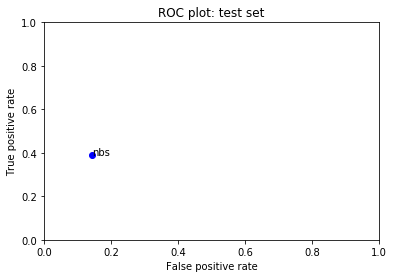

In [12]:
fits = [nbs_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()